# Ploting resutls for best params

## Loading data

In [ ]:
from src.preprocessing.io.feature_loader import FeatureLoader

feature_loader = FeatureLoader(file_name="feature_extracted")
file_path = feature_loader.data_dir / "feature_extracted.csv"
metadata = feature_loader.load_metadata_file(file_path)
print(metadata.shape)

(1125881, 7)


In [ ]:
train_meta, train_emb = feature_loader.load_data_split(split_name="train")
print(train_meta.shape, train_emb.shape)

(788680, 8) (788680, 768)


### Loading 10% of dataset

In [ ]:
sampled_train_meta = feature_loader.sample_data(metadata=train_meta, fraction=0.1)
sampled_train_emb = train_emb[sampled_train_meta.index]
print(sampled_train_meta.shape, sampled_train_emb.shape)

(78868, 8) (78868, 768)


### Loading 5% of dataset

In [ ]:
sampled_train_meta = feature_loader.sample_data(metadata=train_meta, fraction=0.05)
sampled_train_emb = train_emb[sampled_train_meta.index]
print(sampled_train_meta.shape, sampled_train_emb.shape)

(39434, 8) (39434, 768)


### Fitting umaps models and transform sampled_train for visualization and clustering

In [6]:
from umap import UMAP

umap_model = UMAP(
    n_components=2,      # 2 dla wizualizacji, 10–20 dla dalszego klastrowania
    n_neighbors=30,      # większe = gładsza struktura
    min_dist=0.2,
    metric="cosine",  # po L2 odpowiada cosinusowi
    random_state=42,
)

X_umap_2d2 = umap_model.fit_transform(sampled_train_emb)

/Users/mikolajkarapka/Projects/audio-deepfake-detection-uwr/.venv/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


test

In [43]:
from umap import UMAP

umap_model = UMAP(
    n_components=2,      # 2 dla wizualizacji, 10–20 dla dalszego klastrowania
    n_neighbors=90,      # większe = gładsza struktura
    min_dist=0.40,
    metric="cosine",  # po L2 odpowiada cosinusowi
    random_state=42,
)

X_umap_2d2 = umap_model.fit_transform(sampled_train_emb)

/Users/mikolajkarapka/Projects/audio-deepfake-detection-uwr/.venv/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [7]:
umap_model = UMAP(
    n_components=20,      # 2 dla wizualizacji, 10–20 dla dalszego klastrowania
    n_neighbors=30,      # większe = gładsza struktura
    min_dist=0.1,
    metric="cosine",  # po L2 odpowiada cosinusowi
    random_state=42,
)

X_umap_20d = umap_model.fit_transform(sampled_train_emb)

/Users/mikolajkarapka/Projects/audio-deepfake-detection-uwr/.venv/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


### Function for visualization

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def plot_umap_clusters(X_umap_2d, clusters, alpha=0.7, cmap='tab20', size=1):
    print(np.sum(clusters == -1))  # Number of noise points
    print(np.unique(clusters, return_counts=True))
    plt.figure(figsize=(10, 8))
    plt.scatter(X_umap_2d[:, 0], X_umap_2d[:, 1], s=size, alpha=alpha, c=clusters, cmap=cmap)
    plt.xlabel("UMAP 1")
    plt.ylabel("UMAP 2")
    plt.title("UMAP embeddings")
    plt.colorbar(label='Cluster Label')
    plt.legend()
    plt.show()

### Cluster and plot results

#### Cluster and plot with params min_cluster_size=335, min_samples=3, cluster_selection_method="eom"

25541
(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
       33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49,
       50, 51, 52, 53, 54]), array([25541,  2485,   714,   711,   716,   581,   596,   676,   918,
         643,  1880,   642,   533,   430,   702,   585,   736,  1312,
         667,   611,   556,   635,   629,   621,  1330,   562,   520,
        4733,   680,   926,  1068,   580,  1245,   369,  2030,  1500,
         459,  1156,   407,   686,   646,  1170,  2160,   527,   475,
         474,   754,   502,   498,   803,   968,  1381,  4275,   415,
         346,  1103]))


/var/folders/1d/mv_j9c7964b105nch0pj7kgh0000gn/T/ipykernel_30787/430252003.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


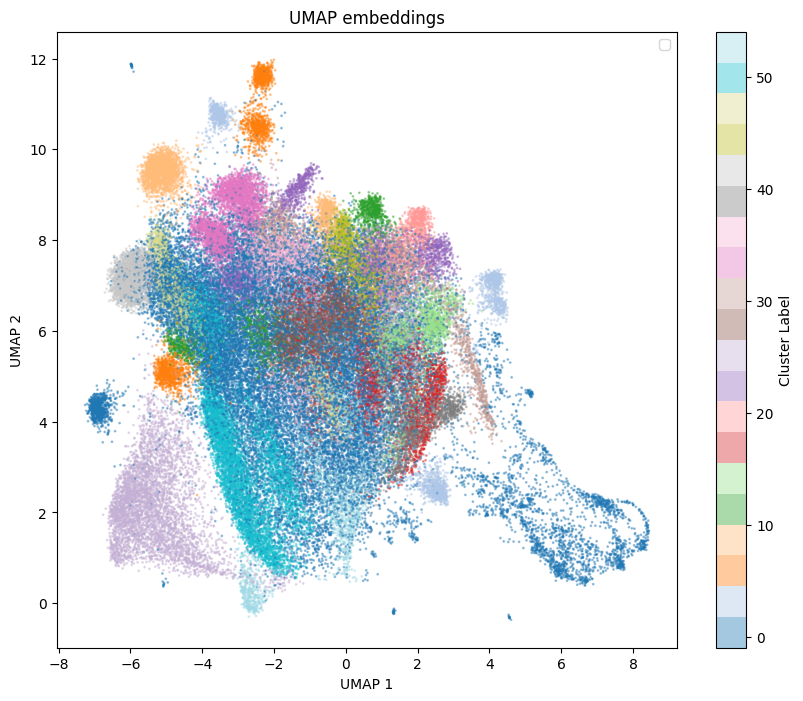

25541
(array([-1]), array([25541]))


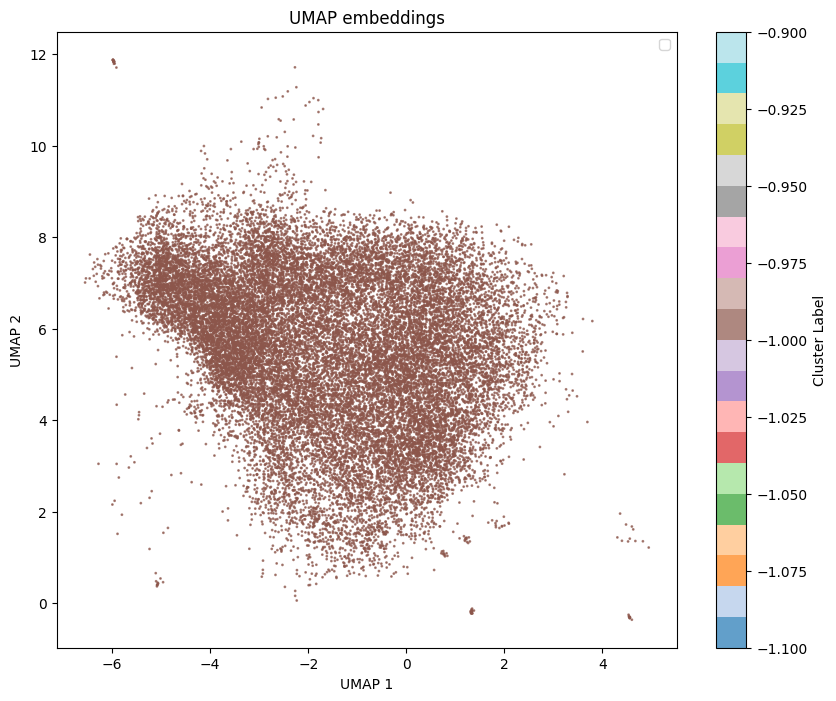

: 

In [ ]:
from hdbscan import HDBSCAN

hdbscan_clf = HDBSCAN(
    min_cluster_size=335,
    min_samples=3,
    metric="euclidean",
    cluster_selection_method="eom",
    prediction_data=True,
)
hdbscan_clf.fit(X_umap_20d)
clusters = hdbscan_clf.labels_

plot_umap_clusters(X_umap_2d2, clusters, alpha=0.4, cmap='tab20', size=1)
anomalies_mask = clusters == -1
plot_umap_clusters(X_umap_2d2[anomalies_mask], clusters[anomalies_mask], alpha=0.7, cmap='tab20', size=1)

#### Cluster and plot with params min_cluster_size=250, min_samples=3, cluster_selection_method="eom"

25948
(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
       33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49,
       50, 51, 52, 53, 54, 55, 56]), array([25948,  2485,   714,   711,   716,   581,   596,   676,   918,
         643,  1880,   642,   533,   430,   702,   585,   736,  1312,
         667,   611,   556,   635,   629,   621,   462,   556,   562,
         520,  4733,   680,   926,  1068,   580,   369,   301,   849,
        2030,  1500,   459,  1156,   407,   686,   646,  1170,  2160,
         527,   475,   474,   754,   502,   498,   803,   968,  1381,
        4275,   415,   346,  1103]))


/var/folders/1d/mv_j9c7964b105nch0pj7kgh0000gn/T/ipykernel_30787/430252003.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


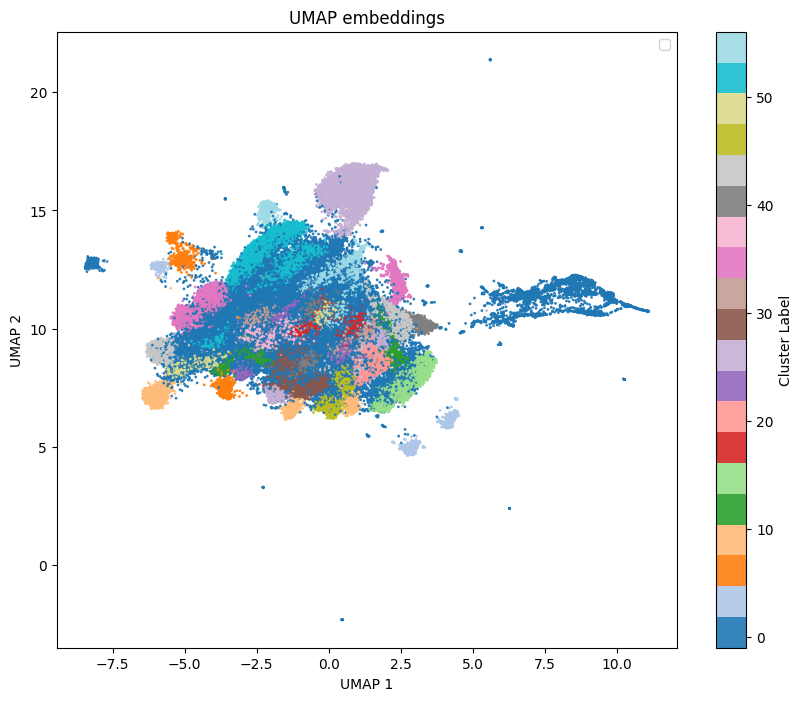

25948
(array([-1]), array([25948]))


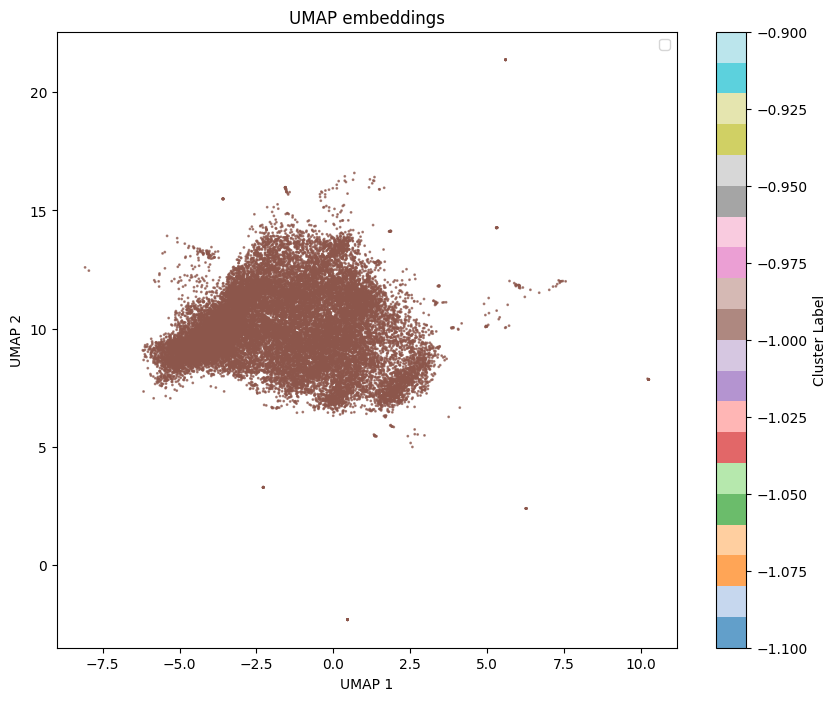

In [12]:
from hdbscan import HDBSCAN

hdbscan_clf = HDBSCAN(
    min_cluster_size=250,
    min_samples=3,
    metric="euclidean",
    cluster_selection_method="eom",
    prediction_data=True,
)
hdbscan_clf.fit(X_umap_20d)
clusters = hdbscan_clf.labels_

plot_umap_clusters(X_umap_2d2, clusters, alpha=0.9, cmap='tab20', size=1)
anomalies_mask = clusters == -1
plot_umap_clusters(X_umap_2d2[anomalies_mask], clusters[anomalies_mask], alpha=0.7, cmap='tab20', size=1)


#### Cluster and plot with params min_cluster_size=120, min_samples=3, cluster_selection_method="eom"

25907
(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
       33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49,
       50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66,
       67, 68, 69, 70]), array([25907,  2485,   714,   711,   716,   581,   596,   676,   918,
         643,  1880,   642,   533,   430,   135,   172,   702,   125,
         585,   736,   930,   219,   667,   611,   556,   187,   635,
         629,   621,   462,   556,   562,   520,  4733,   680,   640,
         244,   214,   437,   164,   580,   369,   301,   849,  2030,
        1500,   137,  1156,   207,   239,   407,   646,   404,   193,
         644,   244,  2160,   527,   475,   474,   463,   245,   502,
         498,   803,   968,   173,  1381,  4275,   415,   346,  1103]))


/var/folders/1d/mv_j9c7964b105nch0pj7kgh0000gn/T/ipykernel_30787/430252003.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


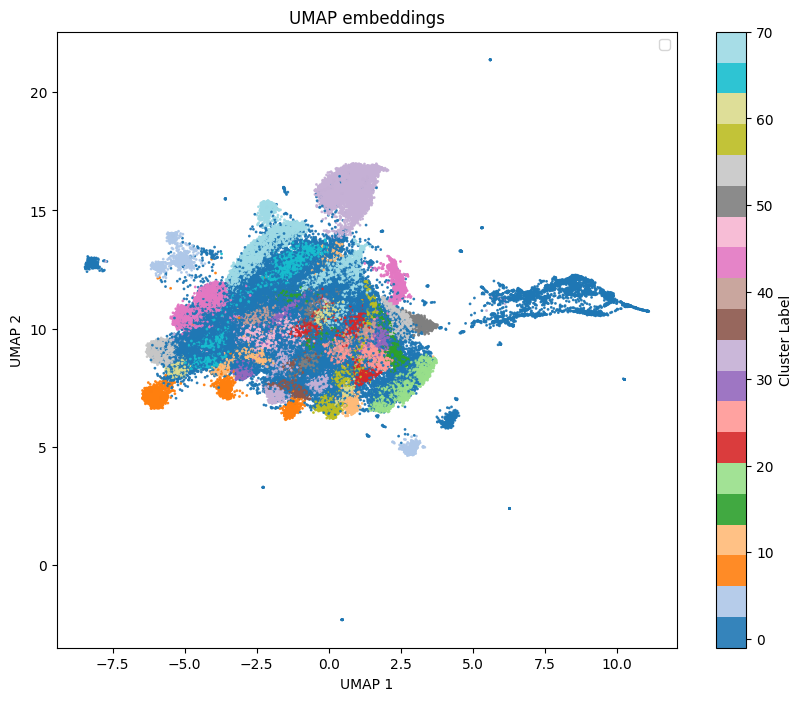

25907
(array([-1]), array([25907]))


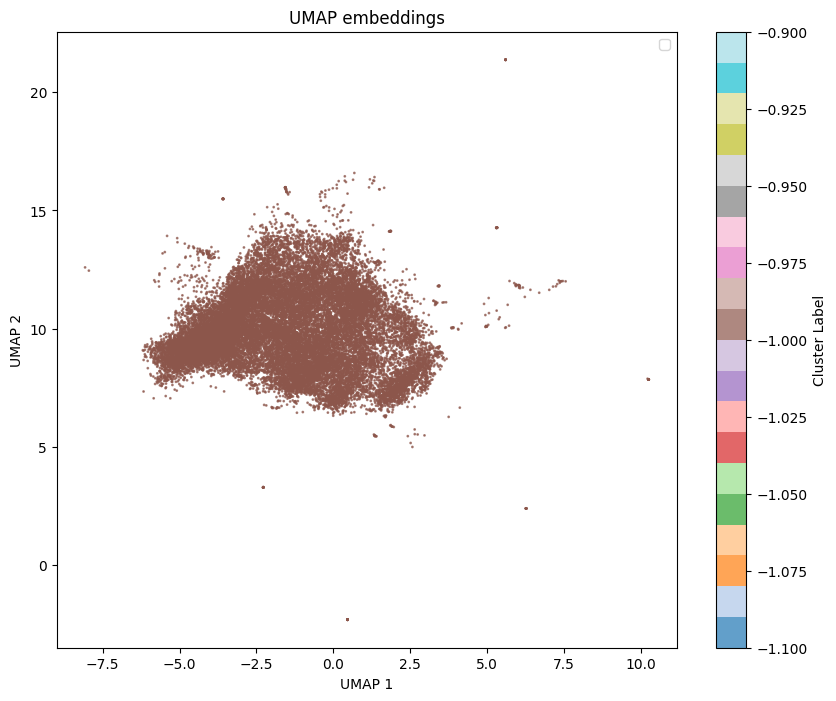

In [23]:
from hdbscan import HDBSCAN

hdbscan_clf = HDBSCAN(
    min_cluster_size=120,
    min_samples=3,
    metric="euclidean",
    cluster_selection_method="eom",
    prediction_data=True,
)
hdbscan_clf.fit(X_umap_20d)
clusters = hdbscan_clf.labels_

hdbscan_clf.fit(X_umap_20d)
clusters = hdbscan_clf.labels_

plot_umap_clusters(X_umap_2d2, clusters, alpha=0.9, cmap='tab20', size=1)
anomalies_mask = clusters == -1
plot_umap_clusters(X_umap_2d2[anomalies_mask], clusters[anomalies_mask], alpha=0.7, cmap='tab20', size=1)

In [ ]:
X_all_umap_20d = umap_model.transform(train_emb)

In [ ]:
from hdbscan import approximate_predict
predicted_labels, strengths = approximate_predict(hdbscan_clf, X_all_umap_20d)

### Plot anomalies

### Plot with config labels

In [15]:
uq_config = sampled_train_meta['config'].unique()
mapped_config = {c: i for i, c in enumerate(uq_config)}
config_labels = sampled_train_meta['config'].map(mapped_config).fillna(-1).astype(int).to_numpy()
print(np.unique(config_labels))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


0
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20]), array([3748, 3190, 3666, 2851, 3703, 3697, 3127, 3631, 4945, 3734, 5243,
       3685, 7670, 2371, 3633, 3635, 3657, 3042, 3743, 2905, 2992]))


/var/folders/1d/mv_j9c7964b105nch0pj7kgh0000gn/T/ipykernel_30787/430252003.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


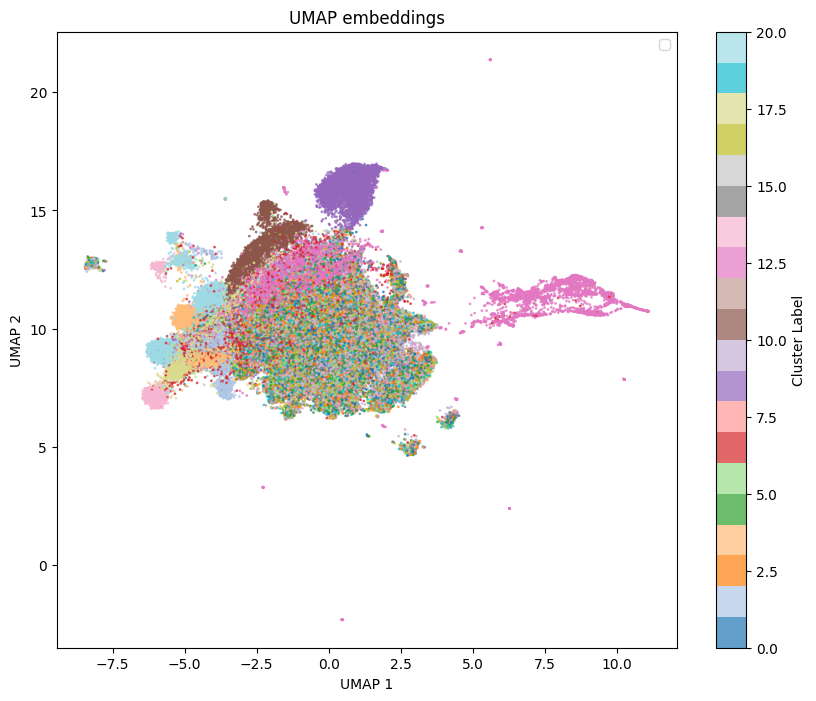

In [16]:
mask_config = config_labels
plot_umap_clusters(X_umap_2d2, config_labels, alpha=0.7, cmap='tab20', size=1)

### Plot with speaker_id labels

In [17]:
uq_speaker = sampled_train_meta['speaker_id'].unique()
mapped_speaker_id = {c: i for i, c in enumerate(uq_speaker)}
speaker_id_labels = sampled_train_meta['speaker_id'].map(mapped_speaker_id).fillna(-1).astype(int).to_numpy()
print(np.unique(speaker_id_labels))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57]


0
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57]), array([1255, 1219, 1351, 1557, 1337, 1355, 1462, 1370, 1233, 1311, 1452,
       1514, 1294, 1325, 1428, 1332, 1304, 1443, 1330, 1367, 1336, 1321,
       1370, 1280, 1267, 1328, 1421, 1577, 1384, 1559, 1373, 1372, 1303,
       1245, 1328, 1311, 1354, 1226, 1510, 1414, 1372, 1305, 1359, 1352,
       1428, 1408, 1396, 1455, 1194, 1133, 1284, 1201, 1490, 1620, 1359,
       1254, 1358, 1382]))


/var/folders/1d/mv_j9c7964b105nch0pj7kgh0000gn/T/ipykernel_30787/430252003.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


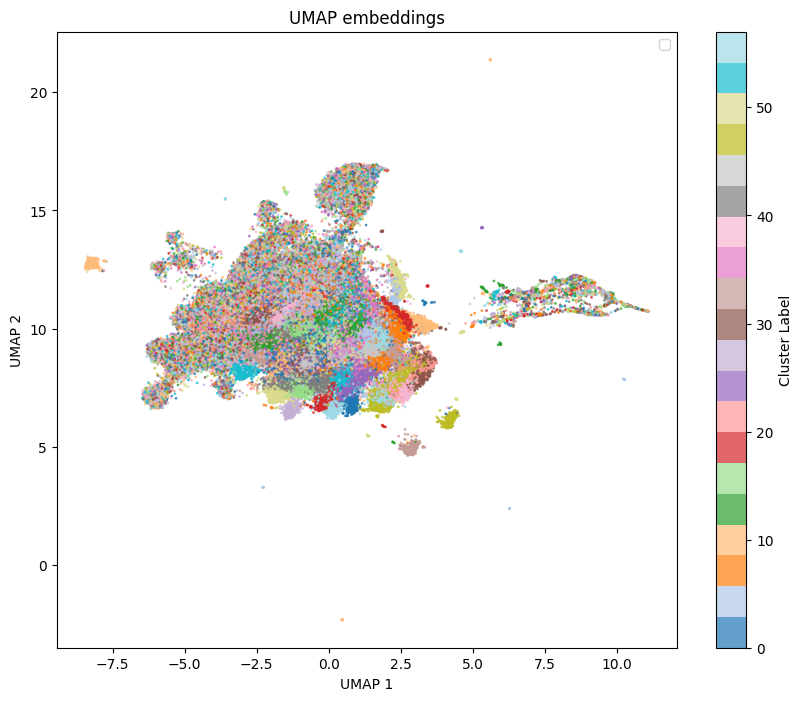

In [18]:
plot_umap_clusters(X_umap_2d2, speaker_id_labels, alpha=0.7, cmap='tab20', size=1)

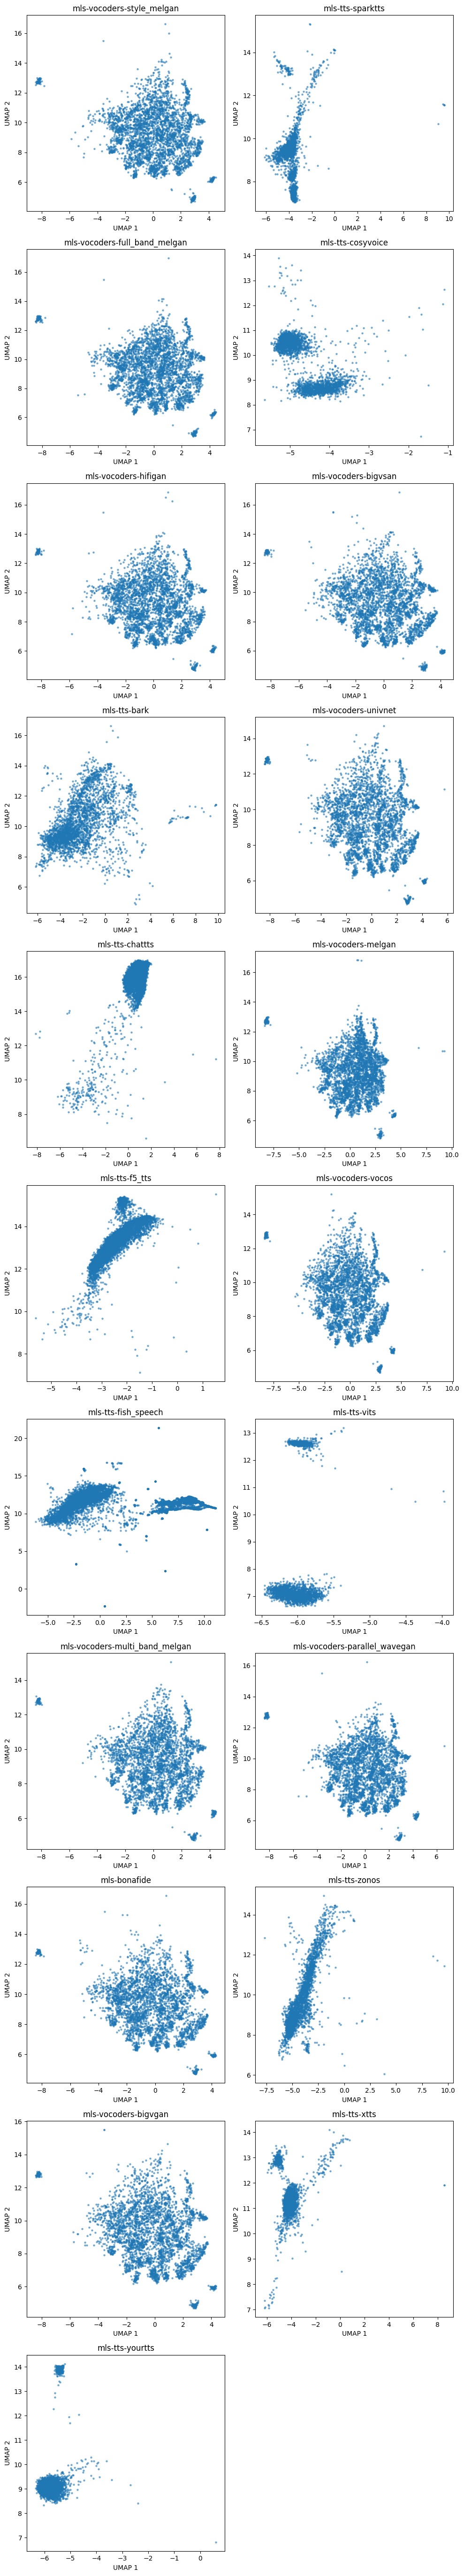

In [19]:
plt.figure(figsize=(10, 55))
for i, (cfg, _) in enumerate(mapped_config.items()):
    plt.subplot(11, 2, i+1)
    mask = sampled_train_meta['config'] == cfg
    plt.scatter(X_umap_2d2[mask, 0], X_umap_2d2[mask, 1], s=5, alpha=0.5)
    plt.xlabel("UMAP 1")
    plt.ylabel("UMAP 2")
    plt.title(f"{cfg}")
plt.tight_layout()